In [49]:
import imp
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier

In [39]:
size = 5000
df = pd.read_csv('data/dataset_outer.csv')
pred_info = df[len(df)-60:]

In [40]:
df = df[len(df)-size-60:len(df)-60]
df = df.dropna(axis=1)
df = df.drop(['Unnamed: 0'], axis=1)
df.index = df.Dia
df.drop(['Dia'], axis=1, inplace=True)

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_scaled = scaler.fit_transform(df.values)

In [42]:
x = []
y = []

for i in range(60, dataset_scaled.shape[0]-20):
    x.append(dataset_scaled[i-60:i,0])
    y.append(dataset_scaled[i:i+20,0])

x, y = np.array(x), np.array(y)

x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [43]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [61]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=20))
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/10
108/108 [==============================] - 17s 104ms/step - loss: 0.0134 - val_loss: 7.1833e-04
Epoch 2/10
108/108 [==============================] - 8s 78ms/step - loss: 0.0035 - val_loss: 5.6411e-04
Epoch 3/10
108/108 [==============================] - 8s 79ms/step - loss: 0.0028 - val_loss: 6.7993e-04
Epoch 4/10
108/108 [==============================] - 8s 77ms/step - loss: 0.0022 - val_loss: 4.5587e-04
Epoch 5/10
108/108 [==============================] - 8s 77ms/step - loss: 0.0018 - val_loss: 4.1067e-04
Epoch 6/10
108/108 [==============================] - 9s 80ms/step - loss: 0.0017 - val_loss: 5.6348e-04
Epoch 7/10
108/108 [==============================] - 8s 78ms/step - loss: 0.0016 - val_loss: 6.9820e-04
Epoch 8/10
108/108 [==============================] - 8s 78ms/step - loss: 0.0015 - val_loss: 4.0229e-04
Epoch 9/10
108/108 [==============================] - 9s 79ms/step - loss: 0.0015 - val_loss: 4.9653e-04
Epoch 10/10
108/108 [==============================] 

In [46]:
model_name = 'LSTM_1'
model.save('models/' + model_name + '/model')

INFO:tensorflow:Assets written to: models/LSTM_1/model\assets


INFO:tensorflow:Assets written to: models/LSTM_1/model\assets


In [62]:
history.history

{'loss': [0.013436008244752884,
  0.003539541969075799,
  0.0028358653653413057,
  0.0022389814257621765,
  0.0018252474255859852,
  0.0017258196603506804,
  0.0016269611660391092,
  0.0014912383630871773,
  0.0014835613546893,
  0.0013729712227359414],
 'val_loss': [0.0007183347479440272,
  0.0005641128518618643,
  0.0006799285183660686,
  0.0004558718646876514,
  0.00041066776611842215,
  0.0005634816479869187,
  0.00069820461794734,
  0.0004022942448500544,
  0.0004965270636603236,
  0.00036305730463936925]}

In [47]:
predicted_stock_price = model.predict(x_test)

24/24 [==============================] - 2s 36ms/step


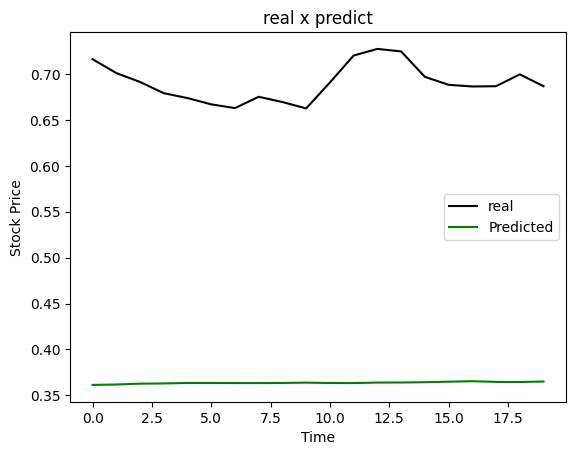

In [26]:
plt.plot(y_test, color = 'black', label = 'real')
plt.plot(predicted_stock_price[5,:], color = 'green', label = 'Predicted')
plt.title('real x predict')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()